In [1]:
import os
import graphviz
from pygraphviz import AGraph

os.environ["PATH"] += os.pathsep + 'C:/Users/vivianjiang/anaconda3/pkgs/graphviz-2.38-hfd603c8_2/Library/bin'

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.font_manager import FontProperties
import re

---
# Draw experimentation results

In [3]:
# Import data
df_result = pd.read_csv('experiment_result_full.txt', sep='\t')

In [4]:
# Extract the mean metric from the results
def split_mean_std(value_string):
    match = re.match(r'([\d.]+)\s*±\s*([\d.]+)', value_string)
    if match:
        mean = float(match.group(1))
        std = float(match.group(2))
        return mean, std
    else:
        raise ValueError(f"Invalid format: {value_string}")
    
metric_cols = ['F1', 'AUROC', 'DPD', 'DI', 'EO']

for col in metric_cols:
    # Apply the split_mean_std function to the column
    mean_std = df_result[col].apply(split_mean_std)
    
    # Create new columns with suffixes
    df_result[f'{col}_mean'] = mean_std.apply(lambda x: x[0])
    df_result[f'{col}_std'] = mean_std.apply(lambda x: x[1])

    ## Drop the original column
    df_result.drop(columns=[col], inplace=True)
    ## Rename the new mean column to the original column name
    df_result.rename(columns={f'{col}_mean': col}, inplace=True)

In [33]:
# Get the data from our experiment results
df1a = df_result[(df_result['Fairness Metric'].notnull()) & (df_result['Validation Set'] == 'Original Data')]
df1b = df_result[(df_result['Fairness Metric'].notnull()) & (df_result['Validation Set'] == 'Sythentic Data')]

## Plot the results that was validated on the original data
df_result_1a = pd.concat([df1a, df_result[df_result['Fairness Metric'].isnull()]], axis=0)

df_result_1b = pd.concat([df1b, df_result[df_result['Fairness Metric'].isnull()]], axis=0)

df_result_1b['Dataset'] = df_result_1b['Dataset'].replace({
    'Dutch Census': 'Dutch',
    'Law School': 'Law'
})

# Update the Mitigation Method values in df_result_1b
df_result_1b['Plot Name Nice'] = df_result_1b['Plot Name Nice'].apply(
    lambda x: x.replace("Fairness-aware HC ", "FHC") if isinstance(x, str) and x.startswith("Fairness-aware HC ") else x
)

print(df_result_1a.columns)

Index(['Dataset', 'Structure Score', 'Fairness Metric', 'Validation Set',
       'Mitigation Method', 'ML Classifier', 'Plot Name Nice', 'F1', 'F1_std',
       'AUROC', 'AUROC_std', 'DPD', 'DPD_std', 'DI', 'DI_std', 'EO', 'EO_std'],
      dtype='object')


Next steps:
- make the text bigger
- find the values best for logistic regression etc. instead of choosing the best structure from xgboost.
- try to see if the graph is better with AUROC on the y-axis

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np

# def create_separate_plots(df):
#     # Set up the Seaborn style
#     sns.set_style("whitegrid")
#     sns.set_context("notebook", font_scale=4.0)  # Increased font scale

#     # Set up the custom font
#     plt.rcParams['font.family'] = 'sans-serif'
#     plt.rcParams['font.sans-serif'] = ['Arial']
    
#     # Increase font sizes
#     plt.rcParams['axes.titlesize'] = 26  # Increased from 22
#     plt.rcParams['axes.labelsize'] = 24  # Increased from 20
#     plt.rcParams['xtick.labelsize'] = 22  # Increased from 18
#     plt.rcParams['ytick.labelsize'] = 22  # Increased from 18
#     plt.rcParams['legend.fontsize'] = 24  # Increased from 20

#         # Define the metrics for y-axis
#     metrics = ['DPD', 'DI', 'EO']
#     metric_lookup = {
#     'DPD': 'DPD ↓',
#     'DI': 'DI ↑',
#     'EO': 'EO ↓',
#     'AUROC': 'AUROC ↑'
#     }

#     classifier_lookup = {
#     'logistic_regression': 'Logistic\nRegression',
#     'mlp': 'MLP',
#     'random_forest': 'Random\nForest',
#     'xgboost': 'XGBoost'
#     }

#     # Define the new order of classifiers
#     classifier_order = ['xgboost', 'random_forest', 'mlp', 'logistic_regression']

#     custom_style = {
#         'Fairness-aware HC [BIC-SPD]': {'marker': '*', 'color': '#f01e2c', 'size': 700},
#         'Fairness-aware HC [AIC-SPD]': {'marker': '*', 'color': '#ff7f7f', 'size': 700},
#         'Fairness-aware HC [BIC-EO]': {'marker': '*', 'color': '#ff7600', 'size': 700},
#         'Fairness-aware HC [AIC-EO]': {'marker': '*', 'color': '#ff9d00', 'size': 700},
#         'Original Dataset': {'marker': 'o', 'color': '#000000', 'size': 400},
#         'Reweighing': {'marker': 'o', 'color': '#ffde16', 'size': 400},
#         'DIR': {'marker': 'o', 'color': '#118ab2', 'size': 400},
#         'LFR': {'marker': 'o', 'color': '#06d6a0', 'size': 400},
#         'FTU': {'marker': 'o', 'color': '#9b59b6', 'size': 400},
#         'FTU+Proxy': {'marker': 'o', 'color': '#4b0082', 'size': 400}
#     }

#     # Iterate over unique datasets
#     for dataset in df['Dataset'].unique():
#         dataset_df = df[df['Dataset'] == dataset]
#         n_classifiers = len(dataset_df['ML Classifier'].unique())

#         # Calculate min and max AUROC values
#         min_auroc = dataset_df['AUROC'].min()
#         max_auroc = dataset_df['AUROC'].max()
        
#         # Create a figure with smaller square subplots for each classifier
#         fig_width = 24  # Increased overall width for better proportions
#         subplot_size = fig_width / 4  # Further reduced size of each square subplot
#         fig_height = (subplot_size * n_classifiers) + 3  # Added more space for legend
        
#         fig, axes = plt.subplots(nrows=n_classifiers, ncols=3, 
#                                  figsize=(fig_width, fig_height), 
#                                  squeeze=False)
        
#         # Flatten the axes array for easier iteration
#         axes = axes.flatten()

#         # Iterate over unique ML Classifiers for this dataset
#         for i, classifier in enumerate(classifier_order):
#             group = dataset_df[dataset_df['ML Classifier'] == classifier]
#             for j, metric in enumerate(metrics):
#                 ax = axes[i * 3 + j]
                
#                 # Create scatterplot for each type of point
#                 for plot_name, style in custom_style.items():
#                     plot_data = group[group['Plot Name Nice'] == plot_name]
#                     ax.scatter(plot_data['AUROC'], plot_data[metric], 
#                                marker=style['marker'], c=style['color'], s=style['size'], 
#                                label=plot_name)
                
#                 # Set labels and title
#                 ax.set_xlabel(metric_lookup['AUROC'], fontsize=20)
#                 ax.set_ylabel(metric_lookup[metric], fontsize=20)
#                 ax.set_title(f'{metric_lookup[metric]}', fontweight='bold', fontsize=22)

#                 # Set x-axis limits and ticks
#                 ax.set_xlim(min_auroc - 0.02, max_auroc + 0.02)  # Add a small buffer
#                 ax.set_xticks(np.linspace(min_auroc, max_auroc, 5))
#                 ax.set_xticklabels([f'{x:.2f}' for x in ax.get_xticks()], fontsize=16)
#                 ax.tick_params(axis='both', which='major', labelsize=18)
                
#                 # Remove top and right spines
#                 sns.despine(ax=ax)
                
#                 # Turn off legend for individual plots
#                 ax.legend_.remove() if ax.get_legend() else None

#             # Calculate the vertical position for the dataset
#             row_height = 1 / n_classifiers
#             label_y_pos = 1 - (i * row_height + row_height / 2)

#             # Add ML Classifier label to the left of each row
#             fig.text(0.05, label_y_pos, classifier_lookup[classifier], 
#                      va='center', ha='right', fontsize=22, fontweight='bold', rotation=0)

#         # Add a single legend to the figure
#         handles, labels = ax.get_legend_handles_labels()
        
#         # Calculate the number of columns for the legend
#         n_cols = len(labels) // 2  # Divide by 2 to create two rows

#         # Create a FontProperties object for bold text
#         bold_font = FontProperties(weight='bold', size=20)

#         # Create a new axis for the legend below the title
#         legend_ax = fig.add_axes([0.12, 0.90, 0.80, 0.08])  # [left, bottom, width, height]
#         legend_ax.axis('off')
#         legend = legend_ax.legend(handles, labels, loc='center', ncol=n_cols, 
#                                   mode="expand", borderaxespad=0., prop=bold_font)
        
#         # Adjust the marker size in the legend
#         for handle in legend.legendHandles:
#             handle._sizes = [300]  # Increased size of legend markers
#         # Adjust layout
#         plt.tight_layout()

#         # Adjust the layout to make room for the legend, title, and ML Classifier labels
#         plt.subplots_adjust(top=0.90, bottom=0.05, left=0.10, right=0.95, hspace=0.3, wspace=0.2)

#         # Set the main title for the entire figure (dataset name)
#         fig.suptitle(f'Dataset: {dataset}', fontsize=32, fontweight='bold', y=0.98)

#         # Save the figure (optional)
#         plt.savefig(f'plots_for_paper/experiment_full_results_{dataset}.pdf', dpi=300, bbox_inches='tight')

#         # Show the plot
#         plt.show()

# # Usage
# df = df_result_1b.copy()
# create_separate_plots(df)

---

# Generate one graph for each ML classifier

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np
# from matplotlib.font_manager import FontProperties

# def create_classifier_plots(df):
#     # Set up the Seaborn style
#     sns.set_style("whitegrid")
#     sns.set_context("paper")  # Changed to paper context for journal-appropriate sizing

#     # Set up the custom font
#     plt.rcParams['font.family'] = 'sans-serif'
#     plt.rcParams['font.sans-serif'] = ['Arial']
    
#     # Adjust font sizes for journal format
#     plt.rcParams['axes.titlesize'] = 9
#     plt.rcParams['axes.labelsize'] = 8
#     plt.rcParams['xtick.labelsize'] = 7
#     plt.rcParams['ytick.labelsize'] = 7
#     plt.rcParams['legend.fontsize'] = 7

#     # Define the metrics for y-axis
#     metrics = ['DPD', 'DI', 'EO']
#     metric_lookup = {
#         'DPD': 'DPD ↓',
#         'DI': 'DI ↑',
#         'EO': 'EO ↓',
#         'AUROC': 'AUROC ↑'
#     }

#     dataset_lookup = {}  # You might want to add nice dataset names here
#     classifier_lookup = {
#         'logistic_regression': 'Logistic Regression',
#         'mlp': 'MLP',
#         'random_forest': 'Random Forest',
#         'xgboost': 'XGBoost'
#     }

#     # Define the order of classifiers
#     classifier_order = ['xgboost', 'random_forest', 'mlp', 'logistic_regression']

#     # Adjusted marker sizes and styles for journal format
#     custom_style = {
#         'Fairness-aware HC [BIC-SPD]': {'marker': '*', 'color': '#f01e2c', 'size': 40},
#         'Fairness-aware HC [AIC-SPD]': {'marker': '*', 'color': '#ff7f7f', 'size': 40},
#         'Fairness-aware HC [BIC-EO]': {'marker': '*', 'color': '#ff7600', 'size': 40},
#         'Fairness-aware HC [AIC-EO]': {'marker': '*', 'color': '#ff9d00', 'size': 40},
#         'Original Dataset': {'marker': 'o', 'color': '#000000', 'size': 25},
#         'Reweighing': {'marker': 'o', 'color': '#ffde16', 'size': 25},
#         'DIR': {'marker': 'o', 'color': '#118ab2', 'size': 25},
#         'LFR': {'marker': 'o', 'color': '#06d6a0', 'size': 25},
#         'FTU': {'marker': 'o', 'color': '#9b59b6', 'size': 25},
#         'FTU+Proxy': {'marker': 'o', 'color': '#4b0082', 'size': 25}
#     }

#     # Iterate over unique ML Classifiers
#     for classifier in classifier_order:
#         classifier_df = df[df['ML Classifier'] == classifier]
#         n_datasets = len(classifier_df['Dataset'].unique())
        
#         # Calculate global min and max AUROC values for consistent scaling
#         min_auroc = classifier_df['AUROC'].min()
#         max_auroc = classifier_df['AUROC'].max()
        
#         # Create a figure with smaller dimensions suitable for journal column width
#         fig_width = 7  # Typical journal column width is around 3.5 inches
#         subplot_size = fig_width / 3.5
#         fig_height = (subplot_size * n_datasets) + 1  # Added space for legend
        
#         fig, axes = plt.subplots(nrows=n_datasets, ncols=3, 
#                                 figsize=(fig_width, fig_height), 
#                                 squeeze=False)
        
#         # Flatten the axes array for easier iteration
#         axes = axes.flatten()

#         # Iterate over unique datasets for this classifier
#         for i, dataset in enumerate(sorted(classifier_df['Dataset'].unique())):
#             group = classifier_df[classifier_df['Dataset'] == dataset]
            
#             for j, metric in enumerate(metrics):
#                 ax = axes[i * 3 + j]
                
#                 # Create scatterplot for each type of point
#                 for plot_name, style in custom_style.items():
#                     plot_data = group[group['Plot Name Nice'] == plot_name]
#                     ax.scatter(plot_data['AUROC'], plot_data[metric], 
#                              marker=style['marker'], c=style['color'], s=style['size'], 
#                              label=plot_name)
                
#                 # Set labels and title
#                 ax.set_xlabel(metric_lookup['AUROC'], fontsize=8)
#                 ax.set_ylabel(metric_lookup[metric], fontsize=8)
#                 ax.set_title(f'{metric_lookup[metric]}', fontweight='bold', fontsize=9)

#                 # Set x-axis limits and ticks
#                 ax.set_xlim(min_auroc - 0.02, max_auroc + 0.02)
#                 ax.set_xticks(np.linspace(min_auroc, max_auroc, 3))  # Reduced number of ticks
#                 ax.set_xticklabels([f'{x:.2f}' for x in ax.get_xticks()], fontsize=7)
#                 ax.tick_params(axis='both', which='major', labelsize=7)
                
#                 # Remove top and right spines
#                 sns.despine(ax=ax)
                
#                 # Remove legend from individual plots
#                 ax.legend_.remove() if ax.get_legend() else None

#             # Add Dataset label
#             dataset_name = dataset_lookup.get(dataset, dataset)
#             ax_pos = axes[i * 3].get_position()
#             fig.text(0.02, ax_pos.y0 + ax_pos.height/2, dataset_name, 
#                     va='center', ha='right', fontsize=8, fontweight='bold', rotation=0)

#         # Add a single legend to the figure
#         handles, labels = ax.get_legend_handles_labels()
#         n_cols = len(labels) // 2
#         bold_font = FontProperties(weight='bold', size=7)

#         # Create a new axis for the legend
#         legend_ax = fig.add_axes([0.12, 0.95, 0.80, 0.04])
#         legend_ax.axis('off')
#         legend = legend_ax.legend(handles, labels, loc='center', ncol=n_cols, 
#                                 mode="expand", borderaxespad=0., prop=bold_font)
        
#         # Adjust the marker size in the legend
#         for handle in legend.legendHandles:
#             handle._sizes = [20]

#         # Adjust layout
#         plt.tight_layout()
#         plt.subplots_adjust(top=0.92, bottom=0.05, left=0.15, right=0.95, hspace=0.4, wspace=0.4)

#         # Set the main title (classifier name)
#         classifier_title = classifier_lookup.get(classifier, classifier)
#         fig.suptitle(f'Classifier: {classifier_title}', fontsize=10, fontweight='bold', y=0.98)

#         # Save the figure
#         plt.savefig(f'plots_for_paper/experiment_full_results_{classifier}.pdf', 
#                    dpi=300, bbox_inches='tight', format='pdf')
#         plt.close()

# # Usage
# df = df_result_1b.copy()
# create_classifier_plots(df)

C:\Users\vivia\AppData\Local\Temp\ipykernel_14256\454132327.py:142: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


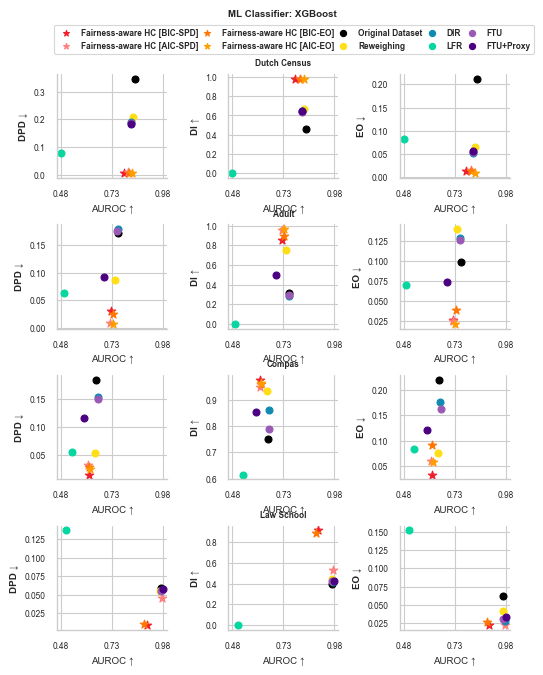

C:\Users\vivia\AppData\Local\Temp\ipykernel_14256\454132327.py:142: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


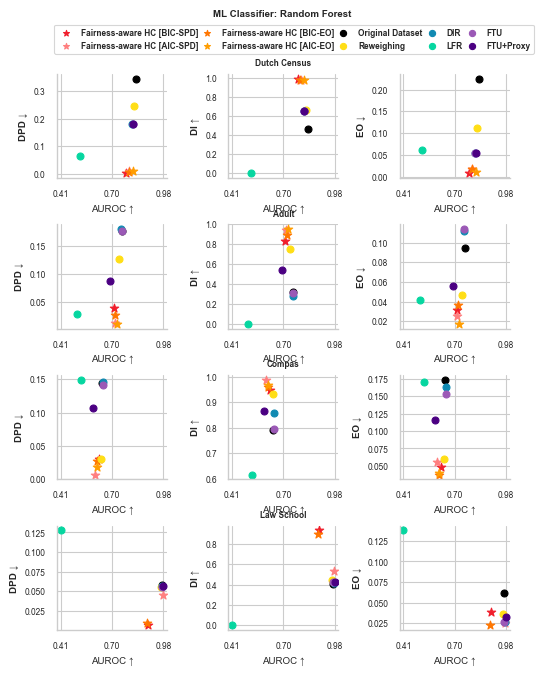

C:\Users\vivia\AppData\Local\Temp\ipykernel_14256\454132327.py:142: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


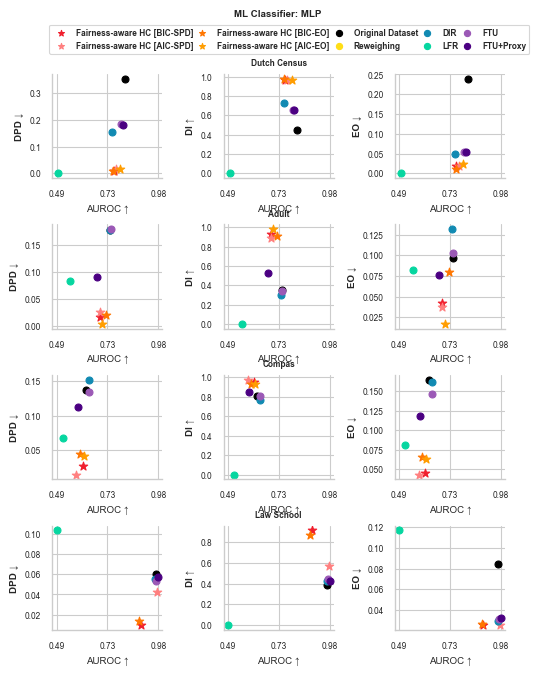

C:\Users\vivia\AppData\Local\Temp\ipykernel_14256\454132327.py:142: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


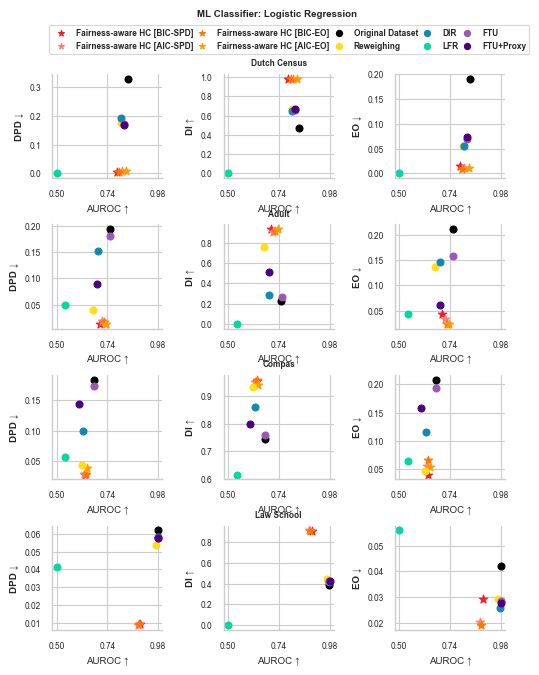

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np
# from matplotlib.font_manager import FontProperties

# def create_classifier_plots(df):
#     # Set up the Seaborn style
#     sns.set_style("whitegrid")
#     sns.set_context("paper")

#     # Set up the custom font
#     plt.rcParams['font.family'] = 'sans-serif'
#     plt.rcParams['font.sans-serif'] = ['Arial']
    
#     # Adjust font sizes for journal format
#     plt.rcParams['axes.titlesize'] = 7
#     plt.rcParams['axes.labelsize'] = 6
#     plt.rcParams['xtick.labelsize'] = 5
#     plt.rcParams['ytick.labelsize'] = 5
#     plt.rcParams['legend.fontsize'] = 5

#     # Define the metrics for y-axis
#     metrics = ['DPD', 'DI', 'EO']
#     metric_lookup = {
#         'DPD': 'DPD ↓',
#         'DI': 'DI ↑',
#         'EO': 'EO ↓',
#         'AUROC': 'AUROC ↑'
#     }

#     dataset_lookup = {}  # You might want to add nice dataset names here
#     classifier_lookup = {
#         'logistic_regression': 'Logistic Regression',
#         'mlp': 'MLP',
#         'random_forest': 'Random Forest',
#         'xgboost': 'XGBoost'
#     }

#     # Define the order of classifiers
#     classifier_order = ['xgboost', 'random_forest', 'mlp', 'logistic_regression']

#     # Define the order of datasets
#     dataset_order = ['Dutch Census', 'Adult', 'Compas', 'Law School']

#     # Adjusted marker sizes and styles for journal format
#     custom_style = {
#         'Fairness-aware HC [BIC-SPD]': {'marker': '*', 'color': '#f01e2c', 'size': 40},
#         'Fairness-aware HC [AIC-SPD]': {'marker': '*', 'color': '#ff7f7f', 'size': 40},
#         'Fairness-aware HC [BIC-EO]': {'marker': '*', 'color': '#ff7600', 'size': 40},
#         'Fairness-aware HC [AIC-EO]': {'marker': '*', 'color': '#ff9d00', 'size': 40},
#         'Original Dataset': {'marker': 'o', 'color': '#000000', 'size': 25},
#         'Reweighing': {'marker': 'o', 'color': '#ffde16', 'size': 25},
#         'DIR': {'marker': 'o', 'color': '#118ab2', 'size': 25},
#         'LFR': {'marker': 'o', 'color': '#06d6a0', 'size': 25},
#         'FTU': {'marker': 'o', 'color': '#9b59b6', 'size': 25},
#         'FTU+Proxy': {'marker': 'o', 'color': '#4b0082', 'size': 25}
#     }

#     # Iterate over unique ML Classifiers
#     for classifier in classifier_order:
#         # Get the formatted classifier title
#         classifier_title = classifier_lookup.get(classifier, classifier)
        
#         classifier_df = df[df['ML Classifier'] == classifier]
#         n_datasets = len(classifier_df['Dataset'].unique())
        
#         # Calculate global min and max AUROC values for consistent scaling
#         min_auroc = classifier_df['AUROC'].min()
#         max_auroc = classifier_df['AUROC'].max()
        
#         # Create a figure with smaller dimensions suitable for journal column width
#         fig_width = 6
#         subplot_size = fig_width / 5
#         # Increased fig_height to accommodate title, legend, and plots with proper spacing
#         fig_height = (subplot_size * n_datasets) + 1.0 + (0.2 * n_datasets) # Increased total height
        
#         # Create figure
#         fig = plt.figure(figsize=(fig_width, fig_height))
        
#         # Create GridSpec with space reserved for title and legend
#         gs = fig.add_gridspec(nrows=n_datasets, ncols=3, 
#                             height_ratios=[0.7] * n_datasets,
#                             top=0.87,  # Reduced top margin to make room for title and legend
#                             bottom=0.01,
#                             hspace=0.3,  # Spacing between rows
#                             wspace=0.4)  # Spacing between columns

#         # Iterate over unique datasets for this classifier
#         for i, dataset in enumerate(dataset_order):
#             group = classifier_df[classifier_df['Dataset'] == dataset]
            
#             for j, metric in enumerate(metrics):
#                 ax = fig.add_subplot(gs[i, j])

#                 # Reduce the size of each subplot
#                 box = ax.get_position()
#                 ax.set_position([box.x0, box.y0, box.width * 0.9, box.height * 0.9])
                
#                 # Create scatterplot for each type of point
#                 for plot_name, style in custom_style.items():
#                     plot_data = group[group['Plot Name Nice'] == plot_name]
#                     ax.scatter(plot_data['AUROC'], plot_data[metric], 
#                              marker=style['marker'], c=style['color'], s=style['size'], 
#                              label=plot_name)
                
#                 # Set labels and title
#                 ax.set_xlabel(metric_lookup['AUROC'], fontsize=7)
#                 ax.set_ylabel(metric_lookup[metric], fontsize=7, fontweight='bold')
                
#                 # Set x-axis limits and ticks
#                 ax.set_xlim(min_auroc - 0.02, max_auroc + 0.02)
#                 ax.set_xticks(np.linspace(min_auroc, max_auroc, 3))
#                 ax.set_xticklabels([f'{x:.2f}' for x in ax.get_xticks()], fontsize=6)
#                 ax.tick_params(axis='both', which='major', labelsize=6)
                
#                 # Remove top and right spines
#                 sns.despine(ax=ax)
                
#                 # Remove legend from individual plots
#                 ax.legend_.remove() if ax.get_legend() else None

#                 # Add dataset name as title for the first subplot in each row
#                 if j == 1:  # Center column
#                     dataset_name = dataset_lookup.get(dataset, dataset)
#                     ax.set_title(dataset_name, pad=6, fontsize=6, fontweight='bold')

#         # Set the main title (classifier name)
#         fig.suptitle(f'ML Classifier: {classifier_title}', fontsize=7, fontweight='bold', y=0.95)

#         # Add a single legend below the title
#         handles, labels = ax.get_legend_handles_labels()
#         n_cols = len(labels) // 2
#         bold_font = FontProperties(weight='bold', size=6)

#         # Create legend with adjusted position
#         legend_ax = fig.add_axes([0.12, 0.88, 0.80, 0.05])  # Adjusted position
#         legend_ax.axis('off')
#         legend = legend_ax.legend(handles, labels, loc='center', ncol=n_cols, 
#                                 mode="expand", borderaxespad=0., prop=bold_font)
        
#         # Adjust the marker size in the legend
#         for handle in legend.legendHandles:
#             handle._sizes = [20]

#         # Save the figure
#         plt.savefig(f'plots_for_paper/experiment_full_results_{classifier}.pdf', 
#                    dpi=300, bbox_inches='tight', format='pdf')
#         plt.show()
#         # plt.close()

# # Usage
# df = df_result_1b.copy()
# create_classifier_plots(df)

C:\Users\vivia\AppData\Local\Temp\ipykernel_18792\290967768.py:178: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


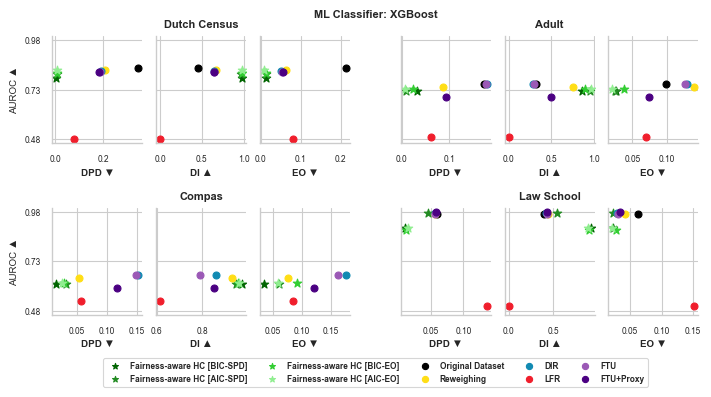

C:\Users\vivia\AppData\Local\Temp\ipykernel_18792\290967768.py:178: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


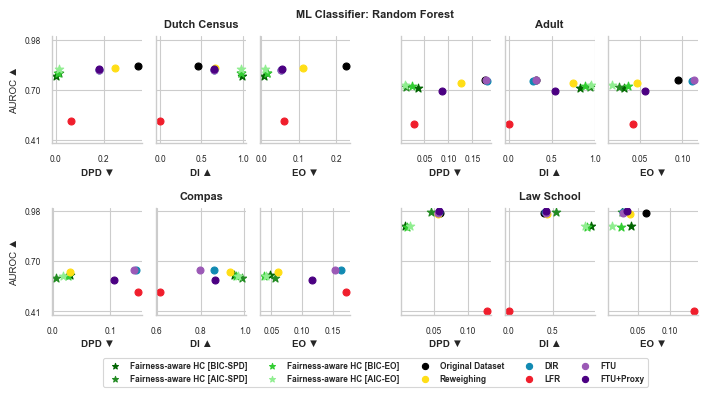

C:\Users\vivia\AppData\Local\Temp\ipykernel_18792\290967768.py:178: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


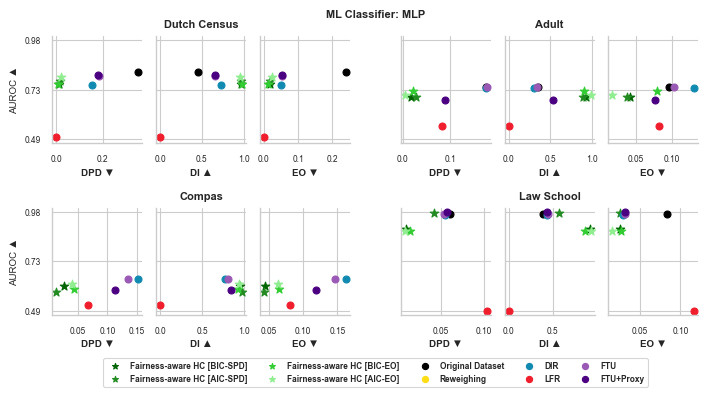

C:\Users\vivia\AppData\Local\Temp\ipykernel_18792\290967768.py:178: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


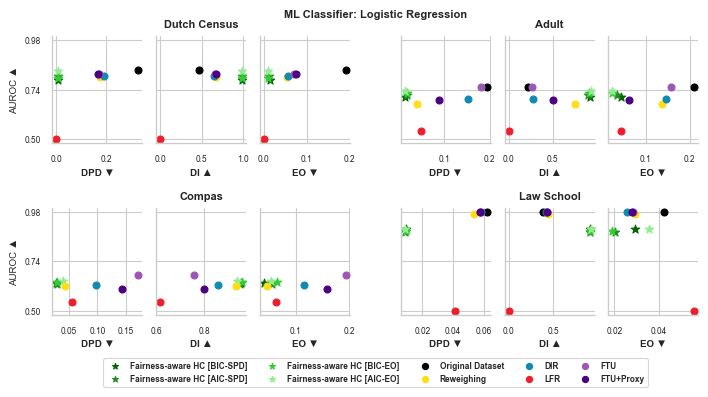

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np
# from matplotlib.font_manager import FontProperties

# def create_classifier_plots(df):
#     # Set up the Seaborn style
#     sns.set_style("whitegrid")
#     sns.set_context("paper")

#     # Set up the custom font
#     # plt.rcParams['font.family'] = 'sans-serif'
#     # plt.rcParams['font.sans-serif'] = ['Arial']
    
#     # Adjust font sizes for journal format
#     plt.rcParams['axes.titlesize'] = 7
#     plt.rcParams['axes.labelsize'] = 6
#     plt.rcParams['xtick.labelsize'] = 5
#     plt.rcParams['ytick.labelsize'] = 5
#     plt.rcParams['legend.fontsize'] = 5

#     # Define the metrics for y-axis
#     metrics = ['DPD', 'DI', 'EO']
#     metric_lookup = {
#         'DPD': 'DPD ▼',  # Unicode black down-pointing triangle
#         'DI': 'DI ▲',    # Unicode black up-pointing triangle
#         'EO': 'EO ▼',    
#         'AUROC': 'AUROC ▲'
#     }

#     dataset_lookup = {}  # You might want to add nice dataset names here
#     classifier_lookup = {
#         'logistic_regression': 'Logistic Regression',
#         'mlp': 'MLP',
#         'random_forest': 'Random Forest',
#         'xgboost': 'XGBoost'
#     }

#     # Define the order of classifiers
#     classifier_order = ['xgboost', 'random_forest', 'mlp', 'logistic_regression']

#     # Define the order of datasets
#     dataset_order = ['Dutch Census', 'Adult', 'Compas', 'Law School']

#     # Calculate number of rows needed (2 datasets per row)
#     n_rows = (len(dataset_order) + 1) // 2

#     custom_style = {
#         'Fairness-aware HC [BIC-SPD]': {'marker': '*', 'color': '#006400', 'size': 40},  # Dark green
#         'Fairness-aware HC [AIC-SPD]': {'marker': '*', 'color': '#228B22', 'size': 40},  # Forest green
#         'Fairness-aware HC [BIC-EO]': {'marker': '*', 'color': '#32CD32', 'size': 40},   # Lime green
#         'Fairness-aware HC [AIC-EO]': {'marker': '*', 'color': '#90EE90', 'size': 40},   # Light green
#         'Original Dataset': {'marker': 'o', 'color': '#000000', 'size': 25},
#         'Reweighing': {'marker': 'o', 'color': '#ffde16', 'size': 25},
#         'DIR': {'marker': 'o', 'color': '#118ab2', 'size': 25},
#         'LFR': {'marker': 'o', 'color': '#f01e2c', 'size': 25},
#         'FTU': {'marker': 'o', 'color': '#9b59b6', 'size': 25},
#         'FTU+Proxy': {'marker': 'o', 'color': '#4b0082', 'size': 25}
#     }

#     # Iterate over unique ML Classifiers
#     for classifier in classifier_order:
#         classifier_title = classifier_lookup.get(classifier, classifier)
#         classifier_df = df[df['ML Classifier'] == classifier]
        
#         # Calculate global min and max AUROC values for consistent scaling
#         min_auroc = classifier_df['AUROC'].min()
#         max_auroc = classifier_df['AUROC'].max()
        
#         # Create a figure with dimensions suitable for journal column width
#         fig_width = 8.5
#         subplot_size = fig_width / 7
#         fig_height = (subplot_size * n_rows) + 2.0
        
#         # Create figure
#         fig = plt.figure(figsize=(fig_width, fig_height))
        
#         # Create figure with a single GridSpec for the title
#         gs_top = fig.add_gridspec(nrows=1, ncols=1, height_ratios=[1], top=0.98, bottom=0.90)
        
#         # Create two separate GridSpecs for the two datasets in each row
#         gs1 = fig.add_gridspec(nrows=n_rows, ncols=3,
#                             height_ratios=[0.7] * n_rows,
#                             top=0.88, bottom=0.25,    # Increased bottom to 0.30
#                             left=0.12, right=0.47,    
#                             hspace=0.6,               # Reduced from 0.8 to 0.6
#                             wspace=0.15)  
        
#         gs2 = fig.add_gridspec(nrows=n_rows, ncols=3,
#                             height_ratios=[0.7] * n_rows,
#                             top=0.88, bottom=0.25,    # Increased bottom to 0.30
#                             left=0.53, right=0.88,    
#                             hspace=0.6,               # Reduced from 0.8 to 0.6
#                             wspace=0.15)  
                            
#         # Iterate over dataset pairs
#         for row in range(n_rows):
#             dataset_idx1 = row * 2
#             dataset_idx2 = row * 2 + 1
            
#             # Process two datasets in each row
#             for dataset_num, dataset_idx in enumerate([dataset_idx1, dataset_idx2]):
#                 if dataset_idx < len(dataset_order):
#                     dataset = dataset_order[dataset_idx]
#                     group = classifier_df[classifier_df['Dataset'] == dataset]
                    
#                     # Use appropriate GridSpec based on dataset number
#                     current_gs = gs1 if dataset_num == 0 else gs2
                    
#                     # Plot three metrics for the current dataset
#                     for j, metric in enumerate(metrics):
#                         ax = fig.add_subplot(current_gs[row, j])
                        
#                         # Create scatterplot for each type of point
#                         for plot_name, style in custom_style.items():
#                             plot_data = group[group['Plot Name Nice'] == plot_name]
#                             ax.scatter(plot_data[metric], plot_data['AUROC'],
#                                     marker=style['marker'], c=style['color'], s=style['size'], 
#                                     label=plot_name)
                        
#                         # Set x-label (metric)
#                         ax.set_xlabel(metric_lookup[metric], fontsize=7, fontweight='bold', labelpad=3)
                        
#                         # Adjust dataset title position for more space
#                         if j == 1:
#                             dataset_name = dataset_lookup.get(dataset, dataset)
#                             ax.set_title(dataset_name, pad=10, fontsize=7, fontweight='bold')
                        
#                         # Only set y-label (AUROC) for leftmost subplot in each row
#                         if dataset_num == 0 and j == 0:
#                             ax.set_ylabel(metric_lookup['AUROC'], fontsize=7)
#                         else:
#                             ax.set_ylabel('')
                        
#                         # Set y-axis limits for AUROC
#                         ax.set_ylim(min_auroc - 0.02, max_auroc + 0.02)
#                         ax.set_yticks(np.linspace(min_auroc, max_auroc, 3))
                        
#                         # Only show y-tick labels for leftmost subplot in each row
#                         if dataset_num == 0 and j == 0:
#                             ax.set_yticklabels([f'{x:.2f}' for x in ax.get_yticks()], fontsize=6)
#                         else:
#                             ax.set_yticklabels([])
                        
#                         ax.tick_params(axis='x', which='major', labelsize=6)
                        
#                         # Remove top and right spines
#                         sns.despine(ax=ax)
                        
#                         # Remove legend from individual plots
#                         ax.legend_.remove() if ax.get_legend() else None

#                         # Add dataset name as title for the middle metric
#                         if j == 1:
#                             dataset_name = dataset_lookup.get(dataset, dataset)
#                             ax.set_title(dataset_name, pad=6, fontsize=8, fontweight='bold')

#         # Set the main title with adjusted position
#         fig.suptitle(f'ML Classifier: {classifier_title}', 
#                     fontsize=8, 
#                     fontweight='bold', 
#                     y=0.94)

#         # Add legend at the bottom
#         handles, labels = ax.get_legend_handles_labels()
#         n_cols = len(labels) // 2
#         bold_font = FontProperties(weight='bold', size=6)

#         # Create legend with adjusted position
#         legend = fig.legend(handles, labels, 
#                         loc='center',
#                         bbox_to_anchor=(0.5, 0.12),
#                         ncol=n_cols,
#                         prop=bold_font,
#                         borderaxespad=0.)
        
#         # Adjust the marker size in the legend
#         for handle in legend.legendHandles:
#             handle._sizes = [20]

#         # Save the figure with tight layout to capture everything
#         plt.savefig(f'plots_for_paper/experiment_full_results_{classifier}.pdf', 
#                    dpi=300, bbox_inches='tight', pad_inches=0.1)
        
#         # Show the current plot
#         plt.show()
        
#         # Close the current plot before creating the next one
#         plt.close()
# # Usage
# df = df_result_1b.copy()
# create_classifier_plots(df)

C:\Users\vivia\AppData\Local\Temp\ipykernel_18792\3268709598.py:210: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


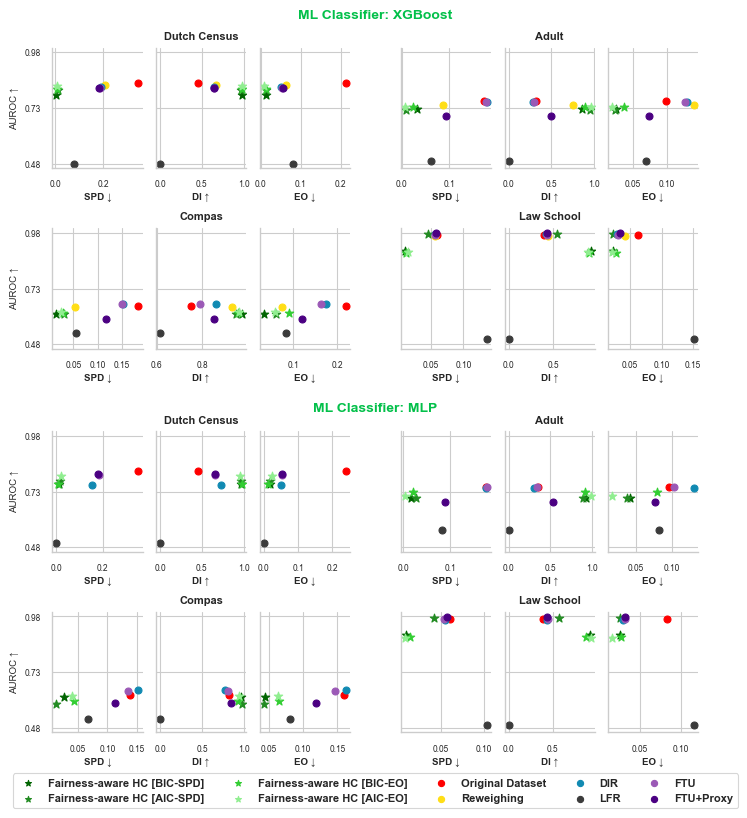

C:\Users\vivia\AppData\Local\Temp\ipykernel_18792\3268709598.py:210: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


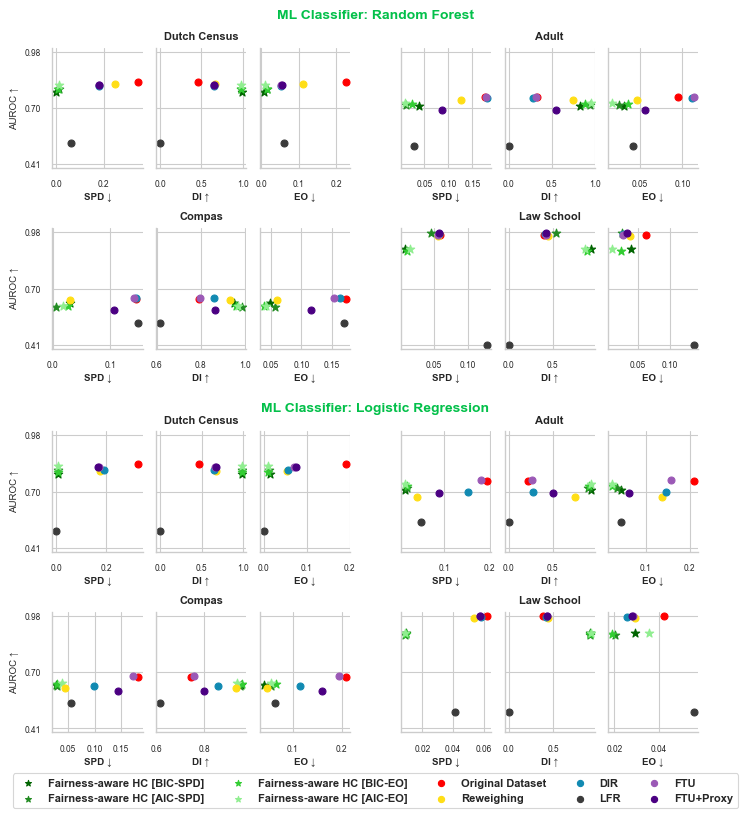

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np
# from matplotlib.font_manager import FontProperties

# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np
# from matplotlib.font_manager import FontProperties

# def create_combined_classifier_plots(df):
#     # Set up the font
#     plt.rcParams['font.family'] = 'Times New Roman'
    
#     # Set up the Seaborn style
#     sns.set_style("whitegrid")
#     sns.set_context("paper")
    
#     # Adjust font sizes for journal format
#     plt.rcParams['axes.titlesize'] = 7
#     plt.rcParams['axes.labelsize'] = 6
#     plt.rcParams['xtick.labelsize'] = 5
#     plt.rcParams['ytick.labelsize'] = 5
#     plt.rcParams['legend.fontsize'] = 5

#     metrics = ['DPD', 'DI', 'EO']
#     metric_lookup = {
#         'DPD': 'SPD ↓',
#         'DI': 'DI ↑',
#         'EO': 'EO ↓',
#         'AUROC': 'AUROC ↑'
#     }

#     dataset_lookup = {}
#     classifier_lookup = {
#         'logistic_regression': 'Logistic Regression',
#         'mlp': 'MLP',
#         'random_forest': 'Random Forest',
#         'xgboost': 'XGBoost'
#     }

#     classifier_groups = [
#         ['xgboost', 'mlp'],
#         ['random_forest', 'logistic_regression']
#     ]

#     dataset_order = ['Dutch Census', 'Adult', 'Compas', 'Law School']

#     custom_style = {
#         'Fairness-aware HC [BIC-SPD]': {'marker': '*', 'color': '#006400', 'size': 40},
#         'Fairness-aware HC [AIC-SPD]': {'marker': '*', 'color': '#228B22', 'size': 40},
#         'Fairness-aware HC [BIC-EO]': {'marker': '*', 'color': '#32CD32', 'size': 40},
#         'Fairness-aware HC [AIC-EO]': {'marker': '*', 'color': '#90EE90', 'size': 40},
#         'Original Dataset': {'marker': 'o', 'color': '#FF0000', 'size': 25},
#         'Reweighing': {'marker': 'o', 'color': '#ffde16', 'size': 25},
#         'DIR': {'marker': 'o', 'color': '#118ab2', 'size': 25},
#         'LFR': {'marker': 'o', 'color': '#3b3b3b', 'size': 25},
#         'FTU': {'marker': 'o', 'color': '#9b59b6', 'size': 25},
#         'FTU+Proxy': {'marker': 'o', 'color': '#4b0082', 'size': 25}
#     }

#     n_rows = (len(dataset_order) + 1) // 2

#     for group_idx, classifier_group in enumerate(classifier_groups):
#         group_df = df[df['ML Classifier'].isin(classifier_group)]
        
#         min_auroc = group_df['AUROC'].min()
#         max_auroc = group_df['AUROC'].max()
        
#         # Adjust figure size
#         fig_width = 8.5
#         subplot_size = fig_width / 7
#         fig_height = (subplot_size * n_rows * 4)
#         fig = plt.figure(figsize=(fig_width, fig_height))

#         # Define equal spacing for both top and bottom groups
#         group_height = 0.31  # Height for each group
#         group_spacing = 0.085  # Space between groups
        
#         # Top group
#         top_bottom = 0.95 - group_height  # Top group bottom position
#         gs1_top = fig.add_gridspec(nrows=n_rows, ncols=3,
#                                  height_ratios=[1] * n_rows,
#                                  top=0.95,
#                                  bottom=top_bottom,
#                                  left=0.12, right=0.47,
#                                  hspace=0.5,  # Increased spacing between rows
#                                  wspace=0.15)
        
#         gs2_top = fig.add_gridspec(nrows=n_rows, ncols=3,
#                                  height_ratios=[1] * n_rows,
#                                  top=0.95,
#                                  bottom=top_bottom,
#                                  left=0.53, right=0.88,
#                                  hspace=0.5,  # Increased spacing between rows
#                                  wspace=0.15)
        
#         # Bottom group
#         bottom_top = top_bottom - group_spacing  # Bottom group top position
#         bottom_bottom = bottom_top - group_height  # Bottom group bottom position
#         gs1_bottom = fig.add_gridspec(nrows=n_rows, ncols=3,
#                                     height_ratios=[1] * n_rows,
#                                     top=bottom_top,
#                                     bottom=bottom_bottom,
#                                     left=0.12, right=0.47,
#                                     hspace=0.5,  # Increased spacing between rows
#                                     wspace=0.15)
        
#         gs2_bottom = fig.add_gridspec(nrows=n_rows, ncols=3,
#                                     height_ratios=[1] * n_rows,
#                                     top=bottom_top,
#                                     bottom=bottom_bottom,
#                                     left=0.53, right=0.88,
#                                     hspace=0.5,  # Increased spacing between rows
#                                     wspace=0.15)
#         all_handles = []
#         all_labels = []
#         legend_collected = False

#         for clf_idx, classifier in enumerate(classifier_group):
#             classifier_df = group_df[group_df['ML Classifier'] == classifier]
            
#             for row in range(n_rows):
#                 dataset_idx1 = row * 2
#                 dataset_idx2 = row * 2 + 1
                
#                 for dataset_num, dataset_idx in enumerate([dataset_idx1, dataset_idx2]):
#                     if dataset_idx < len(dataset_order):
#                         dataset = dataset_order[dataset_idx]
                        
#                         if clf_idx == 0:
#                             current_gs = gs1_top if dataset_num == 0 else gs2_top
#                         else:
#                             current_gs = gs1_bottom if dataset_num == 0 else gs2_bottom
                        
#                         for j, metric in enumerate(metrics):
#                             ax = fig.add_subplot(current_gs[row, j])
                            
#                             group = classifier_df[classifier_df['Dataset'] == dataset]
                            
#                             for plot_name, style in custom_style.items():
#                                 plot_data = group[group['Plot Name Nice'] == plot_name]
#                                 if not plot_data.empty:
#                                     scatter = ax.scatter(plot_data[metric], plot_data['AUROC'],
#                                                       marker=style['marker'],
#                                                       c=style['color'],
#                                                       s=style['size'],
#                                                       label=plot_name)
                                    
#                                     if not legend_collected:
#                                         all_handles.append(scatter)
#                                         all_labels.append(plot_name)
                            
#                             ax.set_xlabel(metric_lookup[metric], fontsize=7, fontweight='bold', labelpad=3)
#                             if j == 1:
#                                 dataset_name = dataset_lookup.get(dataset, dataset)
#                                 ax.set_title(dataset_name, pad=6, fontsize=8, fontweight='bold')
                            
#                             if dataset_num == 0 and j == 0:
#                                 ax.set_ylabel(metric_lookup['AUROC'], fontsize=7)
#                             else:
#                                 ax.set_ylabel('')
                            
#                             ax.set_ylim(min_auroc - 0.02, max_auroc + 0.02)
#                             ax.set_yticks(np.linspace(min_auroc, max_auroc, 3))
                            
#                             if dataset_num == 0 and j == 0:
#                                 ax.set_yticklabels([f'{x:.2f}' for x in ax.get_yticks()], fontsize=6)
#                             else:
#                                 ax.set_yticklabels([])
                            
#                             ax.tick_params(axis='x', which='major', labelsize=6)
#                             sns.despine(ax=ax)
                            
#                             if not legend_collected and len(all_handles) > 0:
#                                 legend_collected = True

#             # Add classifier titles with adjusted spacing
#             if clf_idx == 0:
#                 fig.text(0.5, 0.98, f"ML Classifier: {classifier_lookup[classifier]}", 
#                         fontsize=10, fontweight='bold', ha='center', color='#03c04a')
#             else:
#                 fig.text(0.5, bottom_top + 0.02, f"ML Classifier: {classifier_lookup[classifier]}", 
#                         fontsize=10, fontweight='bold', ha='center', color='#03c04a')
                
#         # Create legend
#         if all_handles and all_labels:
#             unique_handles = []
#             unique_labels = []
#             seen = set()
#             for h, l in zip(all_handles, all_labels):
#                 if l not in seen:
#                     seen.add(l)
#                     unique_handles.append(h)
#                     unique_labels.append(l)
            
#             n_cols = len(unique_labels) // 2
#             if n_cols == 0:
#                 n_cols = 1
            
#             bold_font = FontProperties(weight='bold', size=8)
            
#             legend = fig.legend(unique_handles, unique_labels,
#                             loc='center',
#                             bbox_to_anchor=(0.5, bottom_bottom - 0.06),
#                             ncol=n_cols,
#                             prop=bold_font,
#                             borderaxespad=0.)
            
#             for handle in legend.legendHandles:
#                 handle._sizes = [20]

#         filename = f'plots_for_paper/experiment_combined_results_{classifier_group[0]}_{classifier_group[1]}.pdf'
#         plt.savefig(filename, dpi=300, bbox_inches='tight', pad_inches=0)
#         plt.show()
#         plt.close()

# # Usage
# df = df_result_1b.copy()
# create_combined_classifier_plots(df)

C:\Users\vivia\AppData\Local\Temp\ipykernel_24808\2022939128.py:215: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:
C:\Users\vivia\AppData\Local\Temp\ipykernel_24808\2022939128.py:219: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


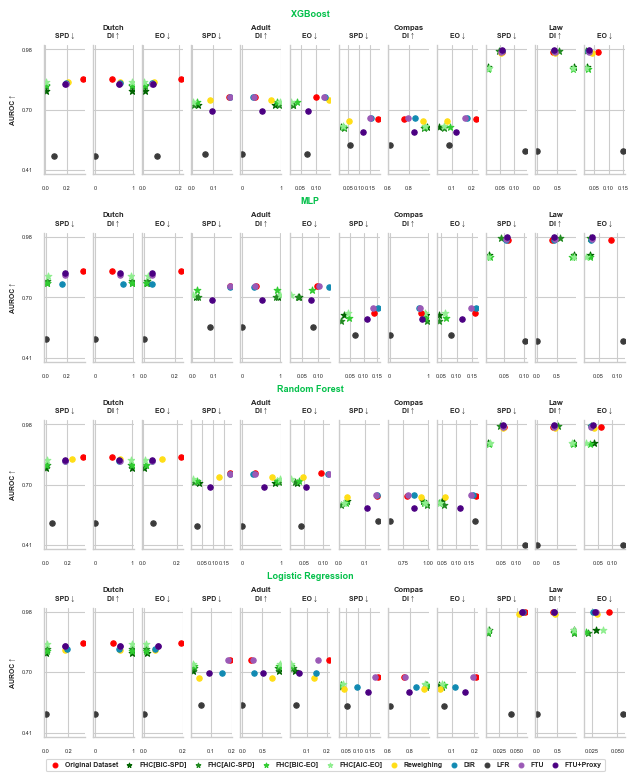

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.font_manager import FontProperties

def create_combined_all_classifier_plots(df):
    # Set up the font for elsarticle format
    plt.rcParams['font.family'] = 'Times New Roman'
    
    # Set up the Seaborn style
    sns.set_style("whitegrid")
    sns.set_context("paper")
    
    # Adjust font sizes for journal format - smaller for elsarticle
    plt.rcParams['axes.titlesize'] = 6
    plt.rcParams['axes.labelsize'] = 5
    plt.rcParams['xtick.labelsize'] = 4
    plt.rcParams['ytick.labelsize'] = 4
    plt.rcParams['legend.fontsize'] = 4

    metrics = ['DPD', 'DI', 'EO']
    metric_lookup = {
        'DPD': 'SPD ↓',
        'DI': 'DI ↑',
        'EO': 'EO ↓',
        'AUROC': 'AUROC ↑'
    }

    dataset_lookup = {}
    classifier_lookup = {
        'logistic_regression': 'Logistic Regression',
        'mlp': 'MLP',
        'random_forest': 'Random Forest',
        'xgboost': 'XGBoost'
    }

    # Make sure all classifier names have the same style and spacing
    classifiers = ['xgboost', 'mlp', 'random_forest', 'logistic_regression']
    dataset_order = ['Dutch', 'Adult', 'Compas', 'Law']
    
    # Define fixed positions for classifier titles to ensure consistency
    clf_positions = {
        'xgboost': 1.22,        # Reduced from 1.25
        'mlp': 1.22,            # Reduced from 1.25
        'random_forest': 1.22,  # Reduced from 1.25
        'logistic_regression': 1.22  # Reduced from 1.25
    }
    
    # Define fixed positions for dataset titles to ensure consistency
    dataset_positions = {
        'xgboost': 1.12,        # Reduced from 1.15
        'mlp': 1.12,            # Reduced from 1.15
        'random_forest': 1.12,  # Reduced from 1.15
        'logistic_regression': 1.12  # Reduced from 1.15
    }

    custom_style = {
        'FHC[BIC-SPD]': {'marker': '*', 'color': '#006400', 'size': 25},
        'FHC[AIC-SPD]': {'marker': '*', 'color': '#228B22', 'size': 25},
        'FHC[BIC-EO]': {'marker': '*', 'color': '#32CD32', 'size': 25},
        'FHC[AIC-EO]': {'marker': '*', 'color': '#90EE90', 'size': 25},
        'Original Dataset': {'marker': 'o', 'color': '#FF0000', 'size': 15},
        'Reweighing': {'marker': 'o', 'color': '#ffde16', 'size': 15},
        'DIR': {'marker': 'o', 'color': '#118ab2', 'size': 15},
        'LFR': {'marker': 'o', 'color': '#3b3b3b', 'size': 15},
        'FTU': {'marker': 'o', 'color': '#9b59b6', 'size': 15},
        'FTU+Proxy': {'marker': 'o', 'color': '#4b0082', 'size': 15}
    }

    # Calculate global min and max for AUROC to ensure consistent axis scaling
    min_auroc = df['AUROC'].min()
    max_auroc = df['AUROC'].max()
    
    # Adjust figure size for elsarticle format (typically 2-column, 190mm width)
    # For single-column elsarticle, width would be around 90mm
    fig_width = 7.5  # in inches (about 190mm)
    fig_height = 7.6  # REDUCED from 8.5 to make it shorter
    
    fig, axes = plt.subplots(4, 12, figsize=(fig_width, fig_height), 
                            gridspec_kw={'wspace': 0.20, 'hspace': 0.45})  # Reduced hspace from 0.55 to 0.45
    
    # Create a flat list of all handles and labels for the legend
    all_handles = []
    all_labels = []
    legend_collected = False
    
    # First, add classifier titles at the top before plotting anything else
    for clf_idx, classifier in enumerate(classifiers):
        # Add classifier titles at the very top of each row
        if axes.shape[1] >= 6:  # Check there are enough columns
            middle_col = axes.shape[1] // 2 - 1
            # Position adjustments for different classifiers to ensure consistent placement
            y_pos = clf_positions[classifier]
            
            axes[clf_idx, middle_col].annotate(f"{classifier_lookup[classifier]}", 
                                            xy=(0.5, y_pos),
                                            xycoords='axes fraction',
                                            fontsize=6.5,  # Reduced slightly from 7
                                            fontweight='bold', 
                                            ha='center', 
                                            color='#03c04a',
                                            bbox=dict(facecolor='white', alpha=0.9, edgecolor='none', pad=1.2))  # Reduced padding from 1.5
    
    # Loop through classifiers
    for clf_idx, classifier in enumerate(classifiers):
        classifier_df = df[df['ML Classifier'] == classifier]
        
        # Loop through datasets
        for dataset_idx, dataset in enumerate(dataset_order):
            # Loop through metrics
            for metric_idx, metric in enumerate(metrics):
                # Calculate axes position
                # Each dataset has 3 metrics, and we have 4 datasets in a row
                ax_col = dataset_idx * 3 + metric_idx
                ax = axes[clf_idx, ax_col]
                
                group = classifier_df[classifier_df['Dataset'] == dataset]
                
                # Plot each data point
                for plot_name, style in custom_style.items():
                    plot_data = group[group['Plot Name Nice'] == plot_name]
                    if not plot_data.empty:
                        scatter = ax.scatter(plot_data[metric], plot_data['AUROC'],
                                          marker=style['marker'],
                                          c=style['color'],
                                          s=style['size'],
                                          label=plot_name)
                        
                        if not legend_collected:
                            all_handles.append(scatter)
                            all_labels.append(plot_name)
                
                # Move x-axis labels to the top of each plot with sufficient distance
                ax.xaxis.set_label_position('top')
                ax.set_xlabel(metric_lookup[metric], fontsize=5, fontweight='bold', labelpad=5)  # Reduced labelpad from 6
                
                # Only add y-label on the first column of each classifier row
                if ax_col == 0:  # First column of each row
                    ax.set_ylabel(metric_lookup['AUROC'], fontsize=5, fontweight='bold')
                else:
                    ax.set_ylabel('')  # Remove y-axis label for all other columns
                
                # Position the dataset name with individual adjustments based on classifier
                if metric_idx == 1:  # Middle metric (DI)
                    dataset_name = dataset_lookup.get(dataset, dataset)
                    # Adjust y position based on which classifier row we're in
                    y_pos = dataset_positions[classifier]
                        
                    ax.annotate(dataset_name, 
                               xy=(0.5, y_pos), 
                               xycoords='axes fraction',
                               fontsize=5.5,  # Reduced from 6
                               fontweight='bold',
                               ha='center',
                               bbox=dict(facecolor='white', alpha=0.9, edgecolor='none', pad=0.3))  # Reduced padding from 0.5
                
                # Consistent y-axis limits
                ax.set_ylim(min_auroc - 0.02, max_auroc + 0.02)
                ax.set_yticks(np.linspace(min_auroc, max_auroc, 3))
                
                # Only show y-tick labels on the first column of each classifier row
                if ax_col == 0:  # First column of the row
                    ax.set_yticklabels([f'{x:.2f}' for x in ax.get_yticks()], fontsize=4)
                else:
                    ax.set_yticklabels([])  # Empty labels for all other columns
                
                ax.tick_params(axis='x', which='major', labelsize=4)
                sns.despine(ax=ax)
                
                if not legend_collected and len(all_handles) > 0:
                    legend_collected = True
    
    # Create one common legend for the entire figure - MODIFIED FOR SINGLE ROW
    if all_handles and all_labels:
        # Create dictionaries to store unique handles and their labels
        unique_items = {}
        seen = set()
        
        for h, l in zip(all_handles, all_labels):
            if l not in seen:
                seen.add(l)
                unique_items[l] = h
        
        # Create a specific order with 'Original Dataset' first
        ordered_labels = []
        ordered_handles = []
        
        # Add 'Original Dataset' first if it exists
        if 'Original Dataset' in unique_items:
            ordered_labels.append('Original Dataset')
            ordered_handles.append(unique_items['Original Dataset'])
            
        # Add all other items in their original order
        for label in unique_items:
            if label != 'Original Dataset':
                ordered_labels.append(label)
                ordered_handles.append(unique_items[label])
        
        # Use all columns in the legend to make it a single row
        n_cols = len(ordered_labels)  # All items in one row
        
        # Increased font size for legend while maintaining one row
        bold_font = FontProperties(weight='bold', size=5)  # Slightly reduced from 5.2
        
        legend = fig.legend(ordered_handles, ordered_labels,
                        loc='lower center',
                        bbox_to_anchor=(0.5, 0.005),  # Moved closer to bottom (0.01 to 0.005)
                        ncol=n_cols,
                        prop=bold_font,
                        borderaxespad=0.,
                        columnspacing=0.6,  # Reduced from 0.7
                        handletextpad=0.4)  # Reduced from 0.5
        
        # Slightly larger markers to match the increased font size
        for handle in legend.legendHandles:
            handle._sizes = [12]  # Reduced from 14
    
    # Adjust spacing between subplots for better layout
    plt.tight_layout()
    
    # Adjusted bottom margin to accommodate larger legend font while keeping it close to plots
    plt.subplots_adjust(bottom=0.05, top=0.96, hspace=0.55)  # Reduced bottom from 0.06 to 0.05
    
    plt.savefig('plots_for_paper/ml_results_all_classifiers.pdf', dpi=300, bbox_inches='tight', pad_inches=0.08)  # Reduced pad_inches from 0.1
    plt.show()
    plt.close()

# Usage
# Assuming df_result_1b is your dataframe with all the classifier data
df = df_result_1b.copy()
create_combined_all_classifier_plots(df)

---
# Lambda Fairness

In [146]:
## Import the ML results
folder_name = 'data_compas/log_20240610'
file_name = 'compas_model_fairness_results_20240610.csv'
df0 = pd.read_csv(os.path.join(folder_name, file_name))
df04 = pd.read_csv('data_compas/log_20240623/compas_model_fairness_results_20240624.csv')

df0 = pd.concat([df0, df04], axis=0)

## Only keep the results from samples that is the same size as original dataset. 
## that is, it starts with ''HC with fairness constraints and same size as original dataset''
## or 'original dataset'
## or 'original dataset with protected attribute removed (FTU)'
df0 = df0[(df0['sample_name'].str.startswith('HC with fairness constraints and same size as original dataset')) |
          (df0['sample_name'] == 'original dataset') |
          (df0['sample_name'] == 'original dataset with protected attribute removed (FTU)')|
          (df0['sample_name'] == 'original dataset with protected attribute and proxies removed (FTU_2)')|
          (df0['sample_name'] == 'HC without fairness constraints')]

## Also import the results from other pre-processing methods
folder_name_other = 'results_bias_mitigation'
file_name_other = ['preprocessing_reweighing_20240305.csv',
                   'preprocessing_disparateimpactremover_202402306.csv',
                   'preprocessing_learning_fair_representation_20240306.csv']

df01 = pd.read_csv(os.path.join(folder_name_other, file_name_other[0]))
df02 = pd.read_csv(os.path.join(folder_name_other, file_name_other[1]))
df03 = pd.read_csv(os.path.join(folder_name_other, file_name_other[2]))

## Rename bias mitigation method to sample name
df01['sample_name'] = 'Preprocessing: Reweighing'
df02['sample_name'] = 'Preprocessing: Disparate Impact Remover'
df03['sample_name'] = 'Preprocessing: Learning Fair Representation'

df0 = pd.concat([df0, df01, df02, df03], axis=0)

## Only keep Compas dataset
df0 = df0[(df0['dataset_name'] == 'compas') | (df0['dataset_name'].isna())]

## Only keep xgboost results
df1 = df0[df0['model_type'] == 'xgboost']

## Drop some experiment types
rows_to_drop = ['Initial DAG']
df1 = df1[~df1['sample_name'].isin(rows_to_drop)]

In [147]:
## The statistics has been converted to mean ± std, we only extract the mean value across the columns
df1['precision'] = df1['precision'].apply(lambda x: float(x.split('±')[0]))
df1['recall'] = df1['recall'].apply(lambda x: float(x.split('±')[0]))
df1['f1'] = df1['f1'].apply(lambda x: float(x.split('±')[0]))
df1['AUROC'] = df1['AUROC'].apply(lambda x: float(x.split('±')[0]))
df1['accuracy'] = df1['accuracy'].apply(lambda x: float(x.split('±')[0]))
df1['DPD'] = df1['DPD'].apply(lambda x: float(x.split('±')[0]))
df1['DPR'] = df1['DPR'].apply(lambda x: float(x.split('±')[0]))
df1['EO'] = df1['EO'].apply(lambda x: float(x.split('±')[0]))

In [148]:
## Also extract the lambda values from the sample name
df1['lambda'] = df1['sample_name'].apply(lambda x: float(x.split('lambda =')[1].split(')')[0]) if 'lambda =' in x else None)

## Treate lambda = 0 when there are no fairness constraints
df1['lambda'] = np.where(df1['sample_name'] == 'HC without fairness constraints', 0, df1['lambda'])

In [149]:
## Create a dictionary to map the sample_name to a more readable name
sample_name_dict = {
    'original dataset': 'Original Data',
    'original dataset with protected attribute removed (FTU)': 'FTU',
    'original dataset with protected attribute and proxies removed (FTU_2)': 'FTU+Proxy',
    'Preprocessing: Reweighing': 'RW',
    'Preprocessing: Disparate Impact Remover': 'DIR',
    'Preprocessing: Learning Fair Representation': 'LFR'
}

df1['sample_name_1'] = df1['sample_name'].map(sample_name_dict)

## Add to the dictionary of the sample names the lambda values, if lambda is not NaN
df1['sample_name_1'] = 'λ=' + df1['lambda'].astype(str) if df1['lambda'].notna().all() else df1['sample_name_1']

In [150]:
## Finalise the dataset for plot
df2 = df1[df1['lambda'].notna()]

## Drop results from when lambda = 0.1, 0.2 etc. to make the plot more readable
df2 = df2[(df2['lambda'] >= 2) | (df2['lambda'] == 0)| (df2['lambda'] == 1)]

print(df2['lambda'].unique())

[ 0.  1. 10.  2. 20.  3. 30.  4. 40.  5. 50.  6.  7.  8.  9. 11. 12. 13.
 14. 15. 16. 17. 18. 19. 21. 22. 23. 24. 25. 26. 27. 28. 29. 31. 32. 33.
 34. 35. 36. 37. 38. 39. 41. 42. 43. 44. 45. 46. 47. 48. 49.]


C:\Users\vivia\AppData\Local\Temp\ipykernel_2472\509621174.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


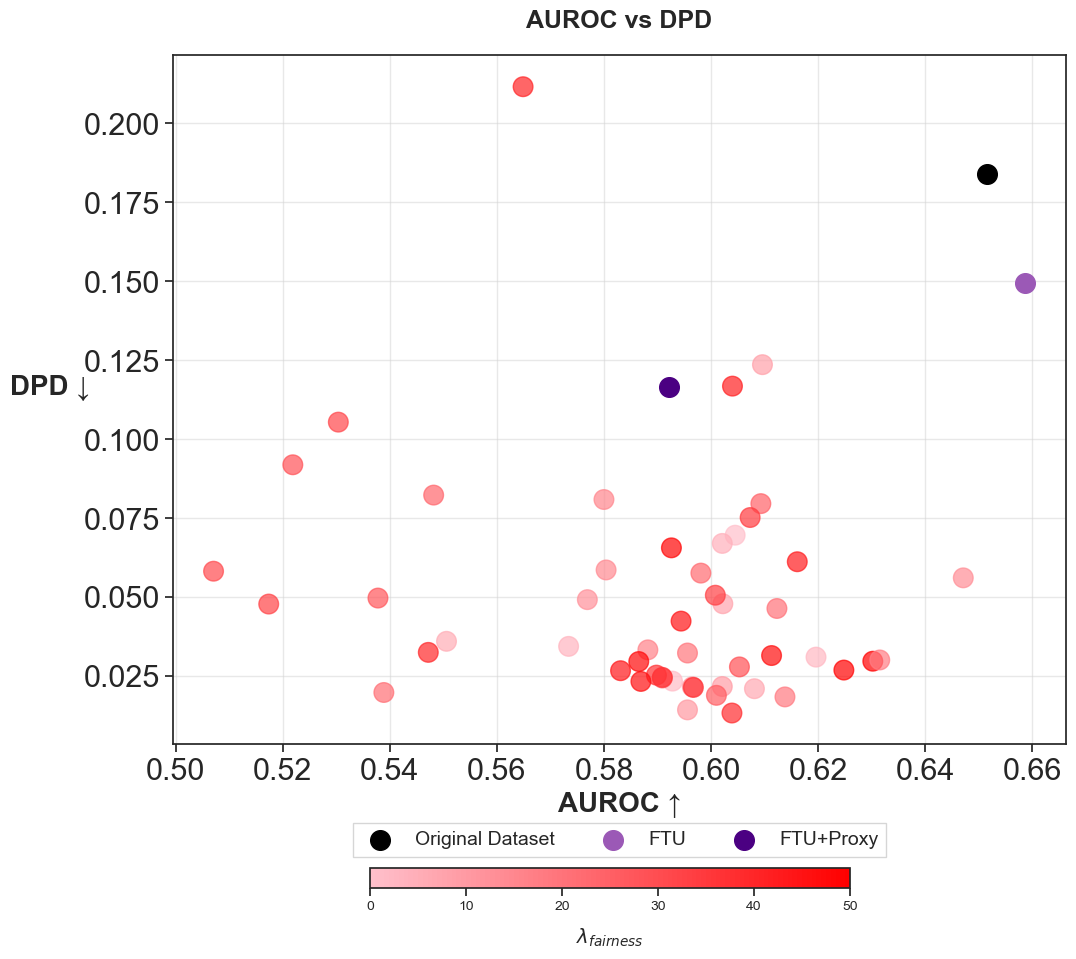

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Assuming df2 is your dataframe with columns 'lambda', 'AUROC', and 'DPD'

# Set up the plot style
sns.set_style("white")
sns.set_style("ticks")
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial']
})

# Create a custom colormap from light pink to dark red
colors = ['#FFC0CB', '#FF0000']  # Light pink to red
n_bins = 100  # Number of color gradations
cmap = LinearSegmentedColormap.from_list("custom_red", colors, N=n_bins)

# Create the plot with adjusted size
fig, ax = plt.subplots(figsize=(12, 10))

# Create a color gradient based on lambda values
norm = plt.Normalize(df2['lambda'].min(), df2['lambda'].max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Plot the scatter points
scatter = ax.scatter(df2['AUROC'], df2['DPD'], c=df2['lambda'], cmap=cmap, s=200, alpha=0.7)

# Get Original Dataset and FTU points from df2
original_dataset = df1[df1['sample_name'] == 'original dataset'].iloc[0]
ftu1 = df1[df1['sample_name'] == 'original dataset with protected attribute removed (FTU)'].iloc[0]
ftu2 = df1[df1['sample_name'] == 'original dataset with protected attribute and proxies removed (FTU_2)'].iloc[0]

ax.scatter(original_dataset['AUROC'], original_dataset['DPD'], color='#000000', s=200, label='Original Dataset')
ax.scatter(ftu1['AUROC'], ftu1['DPD'], color='#9b59b6', s=200, label='FTU')
ax.scatter(ftu2['AUROC'], ftu2['DPD'], color='#4b0082', s=200, label='FTU+Proxy')

# Set labels
ax.set_xlabel('AUROC ↑', fontweight='bold', fontsize=20)
ax.set_ylabel('DPD ↓', fontweight='bold', rotation=0, fontsize=20, labelpad=24)

# Add grid
ax.grid(True, color='lightgrey', alpha=0.5)

# Add title
ax.set_title('AUROC vs DPD', fontweight='bold', fontsize=18, pad=20)

# Adjust subplot to make room for legends at the bottom
plt.subplots_adjust(bottom=0.10)

# Create a new axis for the colorbar at the bottom
cax = fig.add_axes([0.36, 0.05, 0.4, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, cax=cax, orientation='horizontal')
# Adjust the font size of the colorbar tick labels
cbar.ax.tick_params(labelsize=10) 
cbar.set_label(r'$\lambda_{fairness}$', fontsize=14, labelpad=10)

# Add scatter plot legend above the colorbar
legend1 = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=3, fancybox=False, shadow=False, fontsize=14)

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig('plots_for_paper/compas_auc_vs_spd.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()